In [100]:
%reload_ext autoreload
%autoreload 2


In [173]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib.ticker import PercentFormatter
import random
from scipy.stats import norm
from scipy import stats
from six.moves import urllib
import json

from load_data import load
from counter import var_counter
from plot import histoplot
from stat_tests import norm_test

In [102]:
#loading data from raw data files, no specificed path goes to V2 directory
[xcoord, ycoord, array4D]=load()

In [103]:
#stats accroos members
#computing mean and min-max ranges

[member_mean, member_max, member_min]=[np.mean(array4D,axis=0), np.amax(array4D,axis=0), np.amin(array4D,axis=0)]

In [104]:
'TODO:add test to checks tability of results (should always be the same) '
mean_over=var_counter(member_mean,20)
max_over=var_counter(member_max,20)
min_over=var_counter(member_min,10)

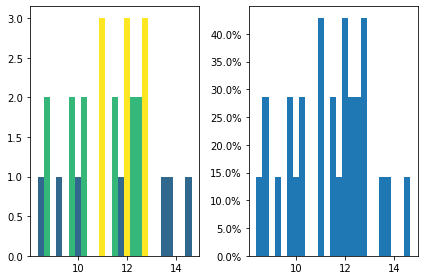

In [162]:
'NOTE: visualising dirtibution'
#plotting values across 28 mmbers (1 location, 1 month)
month=random.randint(0,len(array4D[0,:,0,0])-1)
xloc=random.randint(0,len(array4D[0,0,:,0])-1)
yloc=random.randint(0,len(array4D[0,0,0,:])-1)

vars=array4D[:,month,xloc,yloc]

ysort=np.sort(vars)
histoplot(ysort)


In [171]:
'NOTE: testing for normal distribution'
[total,fitted,fails,Dcrit]=norm_test(array4D)

In [172]:
print(str(fitted)+" fit a normal distribution out of : "+str(total)+" with critical value of: "+str(Dcrit))
print("success rate: " +str(fitted/total))

342742 fit a normal distribution out of : 342914 with critical value of: 0.25
success rate: 0.999498416512595


In [175]:
#Data to be written
dic={
    "name":"asdkfjh",
    "blif":56,
    "cpdsag":8.6,
    "phonenumber":"9976770500"
}

with open("sample.json","w") as outfile:
    json.dump(dic,outfile)

In [177]:
'NOTE: calculatin p90 for all time-space points'
p90_array=np.percentile(array4D,90,axis=0)

In [ ]:
'TODO:plot spatial distribution of values, 3D histogram?'